# The Unbeatable Player

Analyzing the simple two-player game of Toothpick Takeaway to predict win chances and construct an unbeatable player.

## Table of Contents

1. [Introduction](#1.-Introduction)
   - [1.1 Game Theory](#1.1-Game-Theory)
   - [1.2 What is Toothpick Takeaway?](#1.2-What-is-Toothpick-Takeaway)
   - [1.3 The Big Question](#1.3-The-Problem-in-Question)
2. [Amassing Data](#2.-Amassing-Data)
   - [2.1 Working with Computers](#2.1-Working-Efficiently-with-Computers)
   - [2.2 Components of a Game](#2.2-Components-of-a-Game)
   - [2.3 Running Sims](#2.3-Running-Simulations)
3. [Data Analysis](#3.-Data-Analysis)
   - [3.1 Raw Data](#3.1-Viewing-the-Raw-Data)
   - [3.2 Predictions](3.2-Raw-Data)
   - [3.3 Streamlined Stats](#3.3-Streamlined-Statistics)
   - [3.4 Visuals](#3.4-Data-Visualization)
4. [Writing a Smart Strategy](#4.-Writing-a-Smart-Strategy)
5. [Future Work](#5.-Future-Work)
6. [Conclusion](#6.-Conclusion)

## 1. Introduction

### 1.1 Game Theory



A branch of mathematics that supplies a variety of ways for analyzing situations where two or more players begin making decisions that are "interdependent". Each player is then forced because of this interdependence to choose their moves based on the moves made by the other player(s). A solution for a game would be the optimal strategy made that allowed a player to win (note: winning is determined based on each games rules). (Britannica).

Why does this matter? Game Theory is a field of study where the applications can include scenarios such as:

-   Determining political coalitions
-   Determining Business conglomerates
-   Optimal price to sell goods
-   Whom to select from a jury
-   Even to challenge the legality of some voting systems

The focus of this project however, is two player games where there is generally a finite set of moves and a single outcome.

Evolutionary Game Theory originated when mathematicians started applying game theory to more biological ideas/contexts. A driving factor is the ability to collect information and then "simulate learning" based on the data collected. The better the previous times, the better the future plays. In order to avoid a complete deadlock though, the introduction slight variances where a player can "mutate" and make a slightly better or worse move allowing for a different outcome to happen.


### 1.2 What is Toothpick Takeaway?

Toothpick Takeaway is a simple two-player game where both players move in attempts to be the last player to remove a toothpick from the table. The game begins with a number of toothpicks `n` on a table. Both players alternate turns, drawing either one or two toothpicks at each turn. Whichever player removes the last toothpick from the table is declared the winner.

### 1.3 The Problem in Question

As with most games, both players are competing to win and. But, how hard is it to win at Toothpick Takeaway? This simple question raises many more:
* Is there an optimal strategy to win?
* Does it matter if you are Player 1 or Player 2?
* Does the initial number of toothpicks play a significant role?

These few questions all aim to provide more insight into how to win. Accounting all of these leads to a single, encompassing question:
* **Is it possible to play play Toothpick Takeaway in such a way that a player is guaranteed to win every single time?**

The following work aims to answer this question.

## 2. Amassing Data

### 2.1 Working Efficiently with Computers

In order to analyze this question appropriately, a sufficient data set would be needed. To be useful, the data set should contain enough information to be able to calculate the win chance of Player 1 based on a given move at any point in the game. Generating a data set that contains all available information about a move made at a specific time in the game is an excellent place to start.

There are two possible ways of generating such a data set:
1. Play a large number of games
2. Make a computer do it instead

The latter, being infinitely more efficient, is the route chosen here.

### 2.2 Components of a Game

Games can be broken down into plenty of individual components. To simply things and isolate only what is needed for testing, this game will consist of two parts:
1. A `play_game()` function that executes game logic and returns the winner and move history.
2. A `strategy` that each player will use while playing the game.

Initially, a "random pick" strategy will suffice. After we gather data, however, the strategy should determine the most profitable move at each turn.

In [1]:
def play_game(toothpicks, players, p1_data, p2_data):
    """
    Plays a single game of Toothpick Takeaway
    
    Args:
        toothpicks : int
            Number of toothpicks to start with
        players : list
            Players in the game
        p1_data : DataFrame
            Data used by Player 1 to pick an optimal move
        p2_data : DataFrame
            Data used by Player 2 to pick an optimal move
    """
    turn = 0
    winner = None
    move_history = {}
    
    # Gets a move with the appropriate strategy for the supplied player
    move = lambda num: strategy(toothpicks, p1_data) if num == 1 else strategy(toothpicks, p2_data)
    
    while winner is None:
        # Get the current player and opponent
        current_player = players[turn % 2]
        current_opponent = players[(turn + 1) % 2]
        player_name = "player_{}".format(current_player)
        turn = turn + 1
        
        # Get a move from the current player
        current_move = 0
        while current_move != 1 and current_move != 2:
            current_move = move(current_player)

        # Update the move history
        move_history[toothpicks] = {"name": player_name, "move": current_move }

        # Apply the move to the game
        toothpicks -= current_move
        
        # Check for a winner
        if toothpicks == 0:
            winner = player_name
            
    return winner, move_history

In [2]:
from random import choice
def strategy(toothpicks, df):
    """
    Determines the best move for the player at the given turn.
    
    Args:
        board : int
            The number of toothpicks left on the board
    """
    move_selected = False
    possible_moves = [1,2] if toothpicks > 1 else [1]
    moves_tried = []
    
    # If there is no supplied data OR both choices are equal, pick randomly
    if df is None or df["Take 1 Win %"][toothpicks] == df["Take 2 Win %"][toothpicks]:
        while not(move_selected):
            # Get a random move
            move_to_try = choice(possible_moves)

            # If the move is not legal, mark it as tried
            if (toothpicks - move_to_try) < 0:
                moves_tried.append(move_to_try)
            else:
                move_selected = True

            # If all moves have been tried, return None
            if set(moves_tried) == set(possible_moves):
                return None

            return move_to_try
    else:
        # Get the otpimal move
        move_to_try = 1 if df["Take 1 Win %"][toothpicks] > df["Take 2 Win %"][toothpicks] else 2

        # If the move is not legal, mark it as tried and pick the only other option
        if (toothpicks - move_to_try) < 0:
            possible_moves.remove(move_to_try)
            move_to_try = possible_moves[0]

        # If the only other move available is invalid, return None
        if (toothpicks - move_to_try) < 0:
            return None

        return move_to_try

### 2.3 Running Simulations

With the code in place to play a game, the next logical step is to write the necessary scripts to play a large number of games, collect game data, and generate a `.csv` from that data. This will be done in two separate files: One to play the games, and one to write game data to a `.csv`.

Running games involves executing games, storing game data, and writing the data to a `.csv` in the end.

In [3]:
def simulate(num_games, board_size, p1_data, p2_data, filename):
    game_data = []
    for game in range(num_games):
        players = [1, 2]
        winner, history = play_game(board_size, players, p1_data, p2_data)
        game_data.append((winner, history))
    
    # Write to csv
    filename = "{}_{}.csv".format(filename, num_games)
    write_to_csv(game_data, filename)

Writing data to a `.csv` is trickier, but doable.

In [4]:
def write_to_csv(game_data, filename):
    """ Writes game data to a .csv file
    
    Args:
        game_data (dict): Data of a game
        filename (string): Filename to write to
    """
    # Get the total number of toothpicks at the start
    start_val = max(game_data[0][1])
    # Make a descending list of all toothpicks left
    toothpicks_left = list(range(start_val, 0, -1))

    # Create our headings
    headings = []
    for heading in toothpicks_left:
        # Number of toothpicks left
        headings.append(heading)
        # Whose turn it was when those toothpicks were taken
        headings.append("turn_{}".format(heading))
    # Append the winner column
    headings.append("winner")

    # Start building rows; one row per game
    rows = []
    for game in game_data:
        winner, history = game

        # How many toothpicks were taken at each turn in the game
        turns = [turn["move"] for turn in history.values()]
        # Who took those toothpicks
        names = [state["name"] for state in history.values()]

        # Start creating a row
        moves = []
        for i in range(len(turns)):
            # Append the toothpicks taken
            moves.append(turns[i])
            # Append the player who took them
            moves.append(names[i])

            # If a turn was 2, add a turn of 0 after it
            # This ensures that our rows are all the same length
            if turns[i] == 2:
                moves.append(0)
                moves.append(None)

        # Append the winner of the game
        moves.append(winner)

        # Add the row we just made to the running list of rows
        rows.append(moves)

    # Write to csv
    import csv
    with open(filename, "w") as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(headings)
        csvwriter.writerows(rows)

After running the provided script, an output `.csv` file is created containing all of the data from the simulated games. It is now time to begin dissecting this data.

In [5]:
simulate(1000, 10, None, None, "random_random")

## 3. Data Analysis

### 3.1 Viewing the Raw Data

The Python libraries `pandas`, `searborn`, and `matplotlib` will be utilized extensively throughout this process. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Begin by reading the `.csv` data into a `DataFrame` object for processing, and view the top of the data.

In [7]:
tt_df = pd.read_csv("random_random_1000.csv")

In [8]:
tt_df

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,2,player_1,0,NaN,2,player_2,0,NaN,1,player_1,...,player_2,2,player_1,0,NaN,1,player_2,1,player_1,player_1
1,1,player_1,1,player_2,2,player_1,0,NaN,2,player_2,...,NaN,2,player_1,0,NaN,1,player_2,1,player_1,player_1
2,2,player_1,0,NaN,2,player_2,0,NaN,2,player_1,...,NaN,1,player_2,2,player_1,0,NaN,1,player_2,player_2
3,2,player_1,0,NaN,1,player_2,1,player_1,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
4,2,player_1,0,NaN,1,player_2,2,player_1,0,NaN,...,player_2,1,player_1,1,player_2,2,player_1,0,NaN,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,player_1,1,player_2,1,player_1,1,player_2,1,player_1,...,player_2,1,player_1,1,player_2,1,player_1,1,player_2,player_2
996,2,player_1,0,NaN,1,player_2,2,player_1,0,NaN,...,player_2,1,player_1,1,player_2,1,player_1,1,player_2,player_2
997,2,player_1,0,NaN,1,player_2,1,player_1,2,player_2,...,NaN,1,player_1,1,player_2,2,player_1,0,NaN,player_1
998,2,player_1,0,NaN,2,player_2,0,NaN,1,player_1,...,player_2,0,NaN,1,player_1,1,player_2,1,player_1,player_1


Overall, there is data from 1,000 games of two players who chose moves randomly. The data is very verbose and not entirely usable in its current state. It will need to be parsed and edited along the way.

The important takeaways are the following:
1. On a game size of `n` toothpicks, there are `2n + 1` columns
2. Columns are "grouped" into pairs representing "Number of toothpicks left" and "Whose turn it is"
3. The index for the column representing `k` toothpicks left is located at `(2n - 1) - 2k`
4. The index for whose turn it is when there are `k` toothpicks left is `2n - 2k`
5. The winner is always in the last index
6. Some columns are empty, because the prior column was a move of 2 toothpicks drawn

### 3.2 Predictions

As both players are making a completely random move at each turn, it is expected that both players have an equal chance at winning. Something to note, however, is that this may not be true due to the size of the board and/or the nature of the game. The number of initial toothpicks may lead to a higher chance of winning for either player, and the game could be skewed to favor one player by design. To investigate this, a simple model can be made to predict the outcome of the game based on the existing data.

In [9]:
#REGRESSION TIME

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
#we otta look at the original data set to do modeling on in
changes_df = tt_df.copy()
changes_df.replace(to_replace = "player_1", value = 1, inplace = True)
changes_df.replace(to_replace = "player_2", value = 2, inplace = True)

x = np.array(changes_df["10"])
y = np.array(changes_df["winner"])
x = x.reshape(-1,1)
#y = y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(x,y)
 
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train,Y_train)


RandomForestClassifier()

In [10]:
print("train score: " + str(reg_rf.score(X_train,Y_train)))
print("test score: "+ str(reg_rf.score(X_test,Y_test)))

train score: 0.5293333333333333
test score: 0.524


Our initial model shows us exactly what we wanted to see, a close to 50% win chance for player one based on the first move.  We expect a 50% split because both players are taking randomly

### 3.3 Streamlined Statistics

The data set provided is plentiful, but needs to be parsed and formatted into a more usable format to be useful for calculating win probabilities.

This can be achieved in a single function that performs the following steps:
1. Receives inputs of a **dataframe** (the game data) and the **number of toothpicks left** (the turn to fetch data from).
2. Retrieve a subset of the original data frame containing the **number of toothpicks taken at that turn**, **whose took those toothpicks**, and **who won that game**.
3. Remove all data not useful for the desired player's calculations.
4. Calculate the overall win chance for when the specified player took 1 and 2 toothpicks.
5. Format this data into a DataFrame and return it

In [11]:
def get_win_chances(player, df, toothpicks):
    """
    Calculates the win chance for Player 1's two available moves at a specified turn in the game.
    
    Parameters:
        df : DataFrame
            The dataframe to index.
        toothpicks : int
            How many toothpicks were in this game
    
    Returns:
        A dictionary representing the win chances based on Player 1's possible move.
    """
    opponent = "player_{}".format(1 if player == 2 else 2)
    player = "player_{}".format(player)
    win_chances_df = pd.DataFrame(index = range(toothpicks, 0, -1), columns = ["Take 1 Win %", "Take 2 Win %"])

    # Calculate for every turn in the game
    for toothpicks_left in range(toothpicks, 0, -1):
        # Index (in the dataframe) of the move being analyzed
        move_index = (len(df.columns) - 1) - (2 * toothpicks_left)
        who_moved = move_index + 1
        winner = len(df.columns) - 1

        # Fetch the columns
        turn = df[df.columns[[move_index, who_moved, winner]]].dropna()

        # Stringified values for indexing the DataFrame
        turn_index = str(toothpicks_left)    
        who_moved = "turn_{}".format(turn_index)

        # Drop rows where the opposing player moved
        rows_to_drop = [index for index in turn.index if turn[who_moved][index] == opponent]
        turn.drop(index = rows_to_drop, inplace = True)

        # Dictionaries to represent the wins and losses of each move
        wins = {"1": 0, "2": 0}
        losses = {"1": 0, "2": 0}

        # Collect wins/losses
        for item in turn.index:
            # Get the move
            move = str(int(turn[turn_index][item]))

            # If Player 1 won the game, increment the appropriate win counter
            if turn["winner"][item] == player:
                wins[move] += 1
            else:
                # Otherwise, increment the loss counter
                losses[move] += 1

        # Get the total number of games where each move occurred
        total_take_1_games = wins["1"] + losses["1"]
        total_take_2_games = wins["2"] + losses["2"]

        # Generate the probabilities for each move, accounting for division by 0
        take_1_win_chance = wins["1"] / total_take_1_games if total_take_1_games != 0 else 0
        take_2_win_chance = wins["2"] / total_take_2_games if total_take_2_games != 0 else 0

        win_chances_df["Take 1 Win %"][toothpicks_left] = take_1_win_chance*100
        win_chances_df["Take 2 Win %"][toothpicks_left] = take_2_win_chance*100
    return win_chances_df

Given this function, the win chances for a specified player at every move in the game can be computed in a single call.

In [12]:
p1_win_chances = get_win_chances(1, tt_df, 10)
new_df = p1_win_chances.rename(columns={"Take 1 Win %": "ONE", "Take 2 Win %":"TWO"})
#const = [100,100,100,100,100,100,100,100,100,100]
#new_df["constant"] = const
new_df

,ONE,TWO
10,49.5088,44.8065
9,0,0
8,40.6504,56.6372
7,58.5774,46.4419
6,40.3614,32.5
5,35.7798,66.0194
4,72.3502,50.9615
3,44.8087,0
2,0,100
1,100,0


### 3.4 Data Visualization

Now a plot can be created to better summarize the data.

Text(0, 0.5, 'Win %')

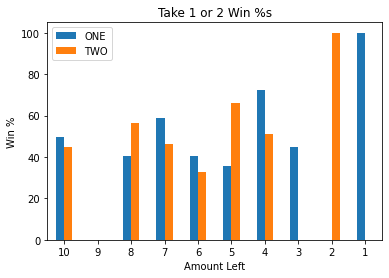

In [13]:
#plt.bar(x = win_chances_df.index, y = ["Take 1 Win %", "Take 2 Win %"], height = 2, width = .5)
#ax = sns.barplot(y = ["Take 1 Win %"], data = p1_win_chan)
#ax = sns.barplot(x = range(10, 0, -1), y = "1", hue = ["1", "2"], data = win_chances_df)

#new_df.plot.bar(x ="constant", y ="ONE", title = "take 1 or 2")
ax = new_df.plot.bar(rot = 0,title = "Take 1 or 2 Win %s")
ax.set_xlabel("Amount Left")
ax.set_ylabel("Win %")

By looking at this plot, we can see that what moves allow player 1 to win have a much higher difference at lower numbers(5 and under) than at the higher(6 and above). Also a note, 9 is blank becase player 1 cannot make a move at 9 toothipicks in any case. 

With these stastistics, a "smart" strategy can be derived for Player 1. The strategy will be "smart" because Player 1 will be able to pick the most optimal move, based on previous data, at every given chance in the game.

## 4. Writing a Smart Strategy

Given the data generated from these games, a "smart" strategy can be created. This strategy is "smart" because, instead of relying on random choice, it relies on past data. At every available move, there is data that can be used to determine which move gave a higher win chance.

All that is needed is to rewrite the player's strategy from earlier to make a move based on this data instead of being random.

Now simply pass this strategy into the existing `simulate()` function and generate new data once again.

In [14]:
simulate(1000, 10, p1_win_chances, None, "smart_random")

In [15]:
smart_df = pd.read_csv("smart_random_1000.csv")
smart_df

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,2,player_2,0,NaN,1,player_1,2,player_2,...,NaN,1,player_1,2,player_2,0,NaN,1,player_1,player_1
1,1,player_1,1,player_2,2,player_1,0,NaN,2,player_2,...,NaN,1,player_1,2,player_2,0,NaN,1,player_1,player_1
2,1,player_1,1,player_2,2,player_1,0,NaN,2,player_2,...,NaN,1,player_1,2,player_2,0,NaN,1,player_1,player_1
3,1,player_1,2,player_2,0,NaN,1,player_1,2,player_2,...,NaN,1,player_1,2,player_2,0,NaN,1,player_1,player_1
4,1,player_1,2,player_2,0,NaN,1,player_1,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
996,1,player_1,2,player_2,0,NaN,1,player_1,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
997,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
998,1,player_1,1,player_2,2,player_1,0,NaN,2,player_2,...,NaN,1,player_1,1,player_2,2,player_1,0,NaN,player_1


It looks as though Player 1 wins *much* more frequently.

In [16]:
len([row for row in smart_df.index if smart_df["winner"][row] == "player_1"])

1000

In fact, Player 1 is winning *every single time*. It is important to note that Player 2 is still playing randomly. This is, however, unimportant. Because the data set spans a massive number of games, and Player 2's randomness will emulate various strategies, Player 1 is still guaranteed to win.

To test this, a few functions would be helpful:
1. Obtain a DataFrame of the best moves across an entire game for a specific player
2. Use the new DataFrames to run a new simulation wherein both players are smarter and produce a new `.csv`
3. Repeat this process

In [17]:
def train_players(iterations, toothpicks, num_games):
    # Simulate the initial game and get its data
    simulate(num_games, toothpicks, None, None, "random_random")
    tt_df = pd.read_csv("random_random_{}.csv".format(num_games))
    #tt_df.drop_duplicates()
    
    # Now run a set number of iterations
    for i in range(iterations):
        # Get the win chances for each player
        p1_win_chances = get_win_chances(1, tt_df, toothpicks)
        p2_win_chances = get_win_chances(2, tt_df, toothpicks)

        print(p2_win_chances)
        simulate(num_games, toothpicks, p1_win_chances, p2_win_chances, "smart_smart")
        tt_df = pd.read_csv("smart_smart_{}.csv".format(num_games))
       
    return tt_df

In [18]:
tt_df = train_players(5, 10, 1000)

   Take 1 Win % Take 2 Win %
10            0            0
9       46.1224      44.4444
8       49.6183           52
7       58.0645      48.2143
6       50.5208       31.068
5        38.342      66.8421
4       78.0142      49.3056
3       47.7987            0
2             0          100
1           100            0
   Take 1 Win % Take 2 Win %
10            0            0
9             0            0
8             0            0
7             0            0
6             0            0
5             0            0
4             0            0
3             0            0
2             0            0
1             0            0
   Take 1 Win % Take 2 Win %
10            0            0
9       9.48617      28.5425
8             0            0
7             0            0
6             0      19.6429
5       24.0602      76.1905
4             0            0
3             0            0
2             0          100
1           100            0
   Take 1 Win % Take 2 Win %
10            

In [19]:
tt_df

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
1,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
2,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
3,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
4,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1
996,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
997,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1,player_1,player_1
998,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,0,NaN,1,player_2,2,player_1,0,NaN,player_1


In [20]:
get_win_chances(2, tt_df, 10)

,Take 1 Win %,Take 2 Win %
10,0,0
9,0,0
8,0,0
7,0,0
6,0,0
5,0,0
4,0,0
3,0,0
2,0,0
1,0,0


As shown in the table above, once player one has data to judge the moves off of, player 2 is no longer able to win with its random moves.

In [22]:
x = np.array(tt_df["10"])
y = np.array(tt_df["winner"])
x = x.reshape(-1,1)
#y = y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(x,y)
reg_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [23]:
print("train score: " + str(reg_rf.score(X_train,Y_train)))
print("test score: "+ str(reg_rf.score(X_test,Y_test)))

train score: 1.0
test score: 1.0


Using the same model as we did earlier, we can see that the model predicts player one 100% win rate when looking at the "smart" player data

## 5. Future Work
While working to solve the big question some new ideas for future work came up. Those ideas include:

   - Implementation of a genetic algorithm to introduce some randomness/ selectivity of the moves chosen and then compare against a `p1` who knows the odds.
   - Generating larger datasets to pull data from in order to see if a pattern exists
   - Increase the number of toothpicks
   - changing the number of legal moves
   - Applying this entire process to other simple games



## 6. Conclusion

In response to the big question, there is in fact a way for a player to win every single time. If the player has prior knowledge to judge the move set off of, then they can "counter" the other player who is playing "blindly". Both of our models confirm this idea as the first one shows us about 50/50 split but once we introduced the idea of `player 1` having a "knowledge bank", then `player 2` no longer had a winning chance. 

As mentioned in our Future Work section, introducing some sort of "mutability" to the decisions that player make could offer better insight into an optimal strategy. Currently our understanding is that if there are 3 toothpicks on the table and its `player 2`'s turn, they will lose no matter what decision would be made (there will always be one or two toothpicks left for `player 1` to take).

## 7. Acknowledgements

https://plato.stanford.edu/entries/game-evolutionary/

https://www.britannica.com/science/game-theory

Dr. Penland for allowing us to change to this data set and with help about printing this file as a pdf.